### Importing Required Python Modules:

In [1]:
import random as r
from collections import Counter
import copy

### Function for generating Initial Population: 

In [2]:
def generate_population(x,n):
    '''This function takes 'x' which is number of individuals in the population and 'n' 
       which is the size of Chess board'''
    
    population=[]
    i=0
    
    while i<x:
        xx=[r.randint(0,n-1) for i in range(n)]
        population.append(xx)
        i+=1
    return population

### Function for evaluating the Fitness of the Individuals:

In [3]:
def fitness_evaluation(individual):
    '''This function takes an individual as argument and tests its fitness 
       i.e., how close is the individual to optimal solution to our n-Queen problem
       
       There are three things that needs to be ensured and based on these factors, we decide the fitness score:
       
       1. No two Queen should share same column 
          (This has been taken care since we generate only one Queen position in one column)
          
       2. No two Queen should share same row 
          (By checking whether distinct number of Queen positions = size of the board)
          
       3. No two Queen should be in diagonal path (By checking relative positions of each positions)'''
    
    weightage_for_faults=0
    board_size=len(individual)
    
#   2. Checking for same-row Queens in Individual:
    c=Counter(individual)
    s=list(c.values())
    
    if s.count(1)==board_size:
        weightage_for_faults=0
        s=[]
    elif s.count(1)!=board_size and s.count(1)>0:
        s=list(filter(lambda z:z!=1,s))
        weightage_for_faults=sum(s)*10
    elif s.count(1)==0:
        weightage_for_faults=sum(s)*10
        
#   3. Checking for diagonal Queens in Individual:
    err_count=0
    temp=0
    
    for i in range(len(individual)):
        x=individual[i]
        if x!=0:
            cmp1=list(range(x,-1,-1))
            cmp2=list(range(x,(board_size)+1,1))
        
            for j in range(i+1,len(cmp1)+temp):
                if j<=len(individual)-1:
                    if individual[j]==cmp1[j-temp] :
                        err_count+=1
        
            for k in range(i+1,len(cmp2)+temp):
                if k<=len(individual)-1:
                    if individual[k]==cmp2[k-temp]:
                        err_count+=1
            temp+=1
            
        elif x==0:
            cmp2=list(range(x,(board_size)+1,1))
            for k in range(i+1,len(cmp2)+temp):
                if k<=len(individual)-1:
                    if individual[k]==cmp2[k-temp]:
                        err_count+=1
                        
            temp+=1
            
        else:
            temp+=1

    weightage_for_faults=weightage_for_faults+(err_count*5)
    return 100-weightage_for_faults 

### Function for Sorting the population based on Fitness Function:

In [4]:
def sort_population_by_fitness(population):
    '''This function takes population as input argument and sort the individuals based on fitness values from 
       min to max'''
    
    return sorted(population, key=fitness_evaluation)

### Selection of Parents for next Generation:

In [5]:
def selection_by_roulette_wheel(population):
    '''This function chooses best candidates for next generation using Roulette Wheel selection method.
       Based on the fitness value, the individuals are selected for next generation population. 
       The more the fitness, greater the chances of getting selected'''
    
    fitness=[]
    for individual in population:
        fitness.append(1/1+(fitness_evaluation(individual)))
    
    probability=[fitness[i]/sum(fitness) for i in range(len(fitness))]
    
    cum_probability=[]
    temp=0
    for i in range(len(probability)):
        temp=temp+probability[i]
        cum_probability.append(temp)
   
    rw=[r.uniform(0,1) for i in range(len(fitness))]
    
    parents=[]
    for i in range(len(rw)):
        temp=rw[i]
        for j in range(len(rw)):
            if temp < cum_probability[j]:
                parents.append(population[j])
                break
   
    return parents

### Cross-over operation:

In [6]:
def crossover(parents,cr):
    '''This function performs the crossover operation by using Single Point Crossover method, 
       takes population and cross-over rate as inputs'''

    crossover_candidates=[]
    parents_cpy=copy.deepcopy(parents)
    
    while True:
        c_rand=[r.uniform(0,1) for i in range(len(parents))]
        
        crossover_candidates=[i for i in range(len(parents)) if c_rand[i] < cr]
        if len(crossover_candidates)==round(len(parents)*0.5):
            break
        else:
            crossover_candidates.clear()
        
    for i in range(len(crossover_candidates)):
        if i!=len(crossover_candidates)-1:
            cp=r.randint(1,len(parents[0])-1)
            parents[crossover_candidates[i]]=parents_cpy[crossover_candidates[i]][0:cp]+\
                                             parents_cpy[crossover_candidates[i+1]][cp:]
        else:
            cp=r.randint(1,len(parents[0])-1)
            parents[crossover_candidates[i]]=parents_cpy[crossover_candidates[i]][0:cp]+\
                                             parents_cpy[crossover_candidates[0]][cp:]
            
    return parents

### Mutation operation:

In [7]:
def mutation(crossed_parents,mr):
    '''This function does Mutation operation, takes population and mutation-rate as input arguments'''
    
    total_genes=len(crossed_parents) * len(crossed_parents[0])
    genes_to_be_mutated=round(mr*total_genes)
    
    mutation_positions=[r.randint(1,total_genes) for i in range(genes_to_be_mutated)]
    mutation_positions.sort()
    mutation_values=[r.randint(0,len(crossed_parents[0])-1) for i in range(genes_to_be_mutated)]
    
    pos_count=1
    for i in range(len(crossed_parents)):
        for j in range(len(crossed_parents[0])):
            if pos_count in mutation_positions:
                crossed_parents[i][j]=mutation_values[mutation_positions.index(pos_count)]
                pos_count+=1
            else:
                pos_count+=1  
                
    mutated_parents=crossed_parents

    return mutated_parents

### Combining the Selection, Cross-over & Mutation operations for preparing next generation:

In [8]:
def prepare_next_generation(previous_population,cr,mr):
    '''This function combines the Selection, Cross-over & Mutation operations 
       and it takes current population, Cross-over Rate (cr) and Mutation Rate (mr) as input arguments'''
    
    parents=selection_by_roulette_wheel(previous_population)
    crossovered_parents=crossover(parents,cr)
    mutated_parents=mutation(crossovered_parents,mr)
    return mutated_parents

### Driver Code for 8-Queen Problem:


**********************************************************************************************

|      Generation Number     |      Max. Fitness (%)     |          Best Individual          |

**********************************************************************************************
|       Generation -   1     |           70              |      [6, 5, 1, 7, 0, 3, 7, 4]     |
|       Generation -   2     |           80              |      [0, 2, 3, 5, 6, 1, 7, 4]     |
|       Generation -   3     |           70              |      [6, 5, 1, 7, 0, 3, 7, 4]     |
|       Generation -   4     |           75              |      [5, 7, 5, 1, 3, 6, 0, 2]     |
|       Generation -   5     |           75              |      [0, 5, 2, 2, 6, 3, 7, 4]     |
|       Generation -   6     |           90              |      [7, 4, 0, 3, 1, 6, 2, 5]     |
|       Generation -   7     |           90              |      [7, 4, 0, 3, 1, 6, 2, 5]     |
|       Generation -   8     |           90    

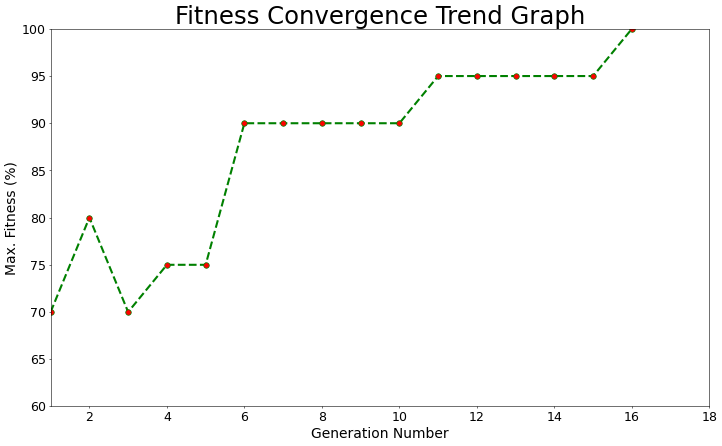

In [9]:
import matplotlib.pyplot as plt

# Setting the GA parameters:
board_size=8
no_of_individuals=450
cr=0.55
mr=0.001
stale_fitness_threshold=15
mutation_stimulus=10



population=generate_population(no_of_individuals,board_size)

print('\n**********************************************************************************************')
print('\n|      Generation Number     |      Max. Fitness (%)     |          Best Individual          |')
print('\n**********************************************************************************************')


fitness_trend=[]

z_current=0
z_previous=0
z_counter=0
mr_cpy=mr


i=1
while True:

    fitness_scores=[fitness_evaluation(individual) for individual in population]
    
    if len(str(i))==1 and len(str(max(fitness_scores)))!=3:
        print(f'|       Generation -   {i}     |           {max(fitness_scores)}              |      {sort_population_by_fitness(population)[-1]}     |')
    
    elif len(str(i))==2 and len(str(max(fitness_scores)))==2:
        print(f'|       Generation -  {i}     |           {max(fitness_scores)}              |      {sort_population_by_fitness(population)[-1]}     |')
        
    elif len(str(i))==2 and len(str(max(fitness_scores)))==3:
        print(f'|       Generation -  {i}     |          {max(fitness_scores)}              |      {sort_population_by_fitness(population)[-1]}     |')
          
    elif len(str(i))==1 and len(str(max(fitness_scores)))==3:
        print(f'|       Generation -   {i}     |          {max(fitness_scores)}              |      {sort_population_by_fitness(population)[-1]}     |')

    elif len(str(i))==3 and len(str(max(fitness_scores)))==2:
        print(f'|      Generation -  {i}     |          {max(fitness_scores)}               |      {sort_population_by_fitness(population)[-1]}     |')
        
    elif len(str(i))==3 and str(max(fitness_scores))==3:
        print(f'|       Generation -  {i}     |{max(fitness_scores)}         |      {sort_population_by_fitness(population)[-1]}     |')    
       



    
#    fitness_trend is for capturing the fitness_scores of all generations:    
    fitness_trend.append(max(fitness_scores))
    
    
    
#    This code block is for stimulating the individuals momentarily in case the algorithm gets stuck in Local Minima.
#    This is done by amplifying the mutation rate by a factor. The mutation rate is switched to original value once 
#    the algorithm gets out of local minima. This helps us to avoid being stuck in local minimum value forever and 
#    helps the algorithm to get back on track of searching the Global Minima.
    z_current=max(fitness_scores)
    if z_current!=z_previous:
        z_previous=z_current
        z_counter=0
        mr=mr_cpy
    else:
        z_counter+=1
        
    if z_counter>stale_fitness_threshold:
        mr=(mr*mutation_stimulus)
    
        
    
    if max(fitness_scores)==100:
          break

    i+=1
          
    population=prepare_next_generation(population,cr,mr)
    

    
    
print('\n**********************************************************************************************')
          
       
best_individual=sort_population_by_fitness(population)[-1]
          
print('\nFinal Result: ')
          
print(best_individual,'\n')




# Plotting fitness trend:
xaxis=range(1,i+1)

fig=plt.figure(figsize=(17,10), dpi=50 , facecolor='w', edgecolor='k')


plt.plot(xaxis, fitness_trend, color='green', linestyle='dashed', linewidth=3, marker='o', markerfacecolor='red', markersize=8)

plt.xlim(1,i+2,1)
plt.ylim(min(fitness_trend)-10,100,5)

plt.xlabel('Generation Number',fontsize=20)
plt.ylabel('Max. Fitness (%)',fontsize=20)

plt.tick_params(labelsize=18)

plt.title('Fitness Convergence Trend Graph',fontsize=35)

# plt.figure(figsize=(100,30))

plt.show()



### Visualizing the solution:

In [10]:
x=best_individual

xl=len(x)

board=[['X' for i in range(xl)] for j in range(xl)]

 
#updating board with queens:
for i in range(xl):
    for j in range(xl):
        if xl-(x[j]+1)==i:
            board[i][j]='Q'


t=len(board)
for i in range(xl):
    print(t,' | ',end='\t')
    for j  in range(xl):
        print(board[i][j],end='\t')
    print('| ',t,'\n')
    t-=1

8  | 	X	X	X	X	X	Q	X	X	|  8 

7  | 	X	Q	X	X	X	X	X	X	|  7 

6  | 	X	X	X	X	X	X	Q	X	|  6 

5  | 	Q	X	X	X	X	X	X	X	|  5 

4  | 	X	X	Q	X	X	X	X	X	|  4 

3  | 	X	X	X	X	Q	X	X	X	|  3 

2  | 	X	X	X	X	X	X	X	Q	|  2 

1  | 	X	X	X	Q	X	X	X	X	|  1 

